In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from PIL import Image, UnidentifiedImageError
from pillow_heif import register_heif_opener
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [25]:
#Create an ml neural network that reads cursive letters

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [70]:
register_heif_opener()

path = "Cursive"
rows = []

#Recieved and data from text folder and converted to csv file
for dirpath, _, filenames in os.walk(path):
    label = os.path.basename(dirpath)
    for filename in filenames:
        filepath = os.path.abspath(os.path.join(dirpath, filename))
        try:
            with Image.open(filepath) as img:
                width, height = img.size
            size_kb = os.path.getsize(filepath) / 1024
            rows.append([label, filepath, width, height, size_kb])
        except UnidentifiedImageError:
            print(f"Skipping unreadable file: {filepath}")

#Recieved and read the data from the csv file using pandas
data = pd.DataFrame(rows, columns=['Label', 'FilePath', 'Width', 'Height', 'FileSizeKB'])
data.to_csv("Cursive.csv", index=False)

data.head()

,Label,FilePath,Width,Height,FileSizeKB
0,S9,/home/jupyter-260721/Machine-Learning-AI-Class...,3024,4032,2332.417969
1,S9,/home/jupyter-260721/Machine-Learning-AI-Class...,3024,4032,2494.708984
2,S9,/home/jupyter-260721/Machine-Learning-AI-Class...,3024,4032,2117.737305
3,S9,/home/jupyter-260721/Machine-Learning-AI-Class...,3024,4032,2208.404297
4,S9,/home/jupyter-260721/Machine-Learning-AI-Class...,3024,4032,2225.207031


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

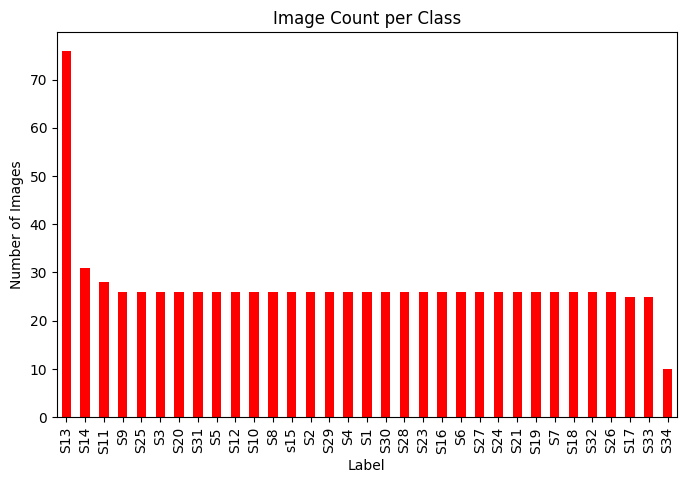

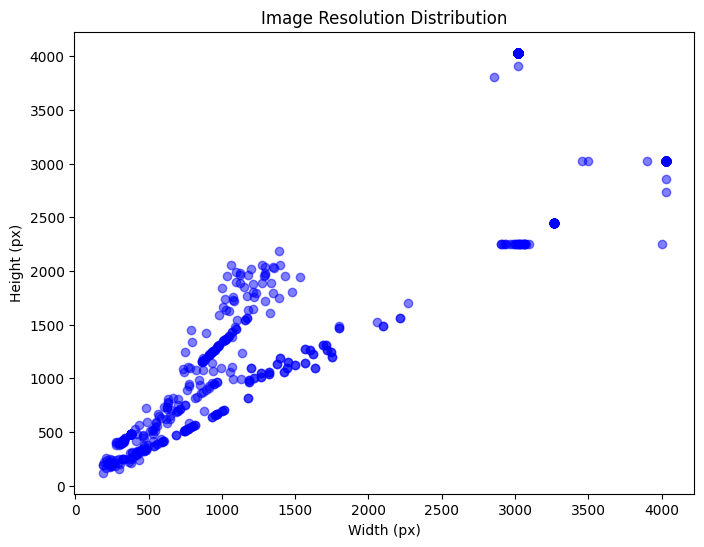

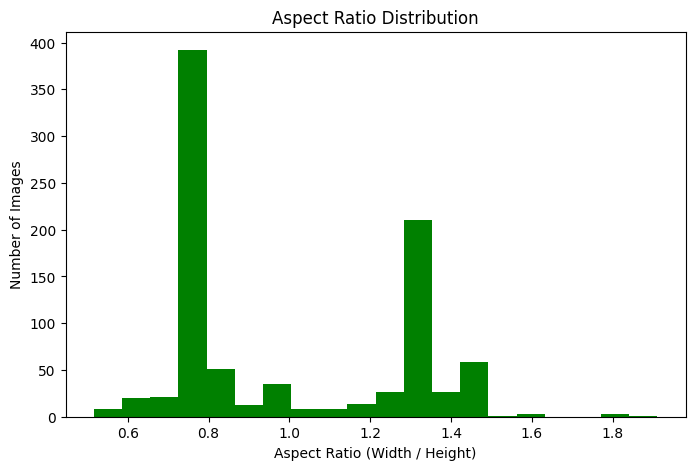

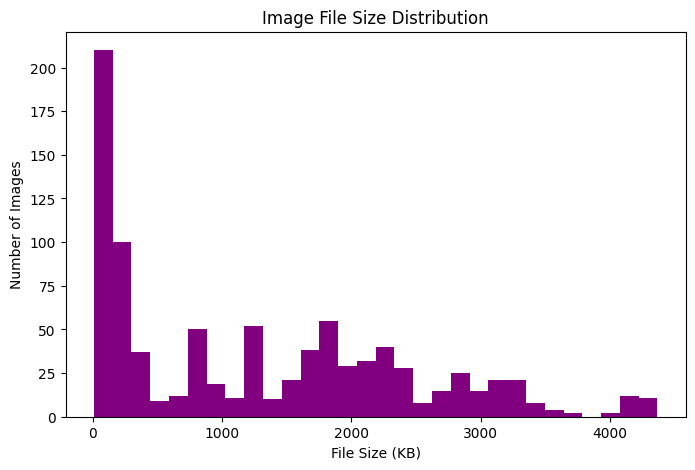

In [74]:

#Checks image count per label
plt.figure(figsize=(8,5))
data['Label'].value_counts().plot(kind='bar', color='red')
plt.ylabel('Number of Images')
plt.title('Image Count per Class')
plt.show()

#Checks height and width of images 
plt.figure(figsize=(8,6))
plt.scatter(data['Width'], data['Height'], alpha=0.5, color='blue')
plt.xlabel('Width (px)')
plt.ylabel('Height (px)')
plt.title('Image Resolution Distribution')
plt.show()

#Checks aspect ratio of images
data['AspectRatio'] = data['Width'] / data['Height']
plt.figure(figsize=(8,5))
plt.hist(data['AspectRatio'], bins=20, color='green')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Number of Images')
plt.title('Aspect Ratio Distribution')
plt.show()

#Checks file size of images
plt.figure(figsize=(8,5))
plt.hist(data['FileSizeKB'], bins=30, color='purple')
plt.xlabel('File Size (KB)')
plt.ylabel('Number of Images')
plt.title('Image File Size Distribution')
plt.show()

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [ ]:
#Converts and transforms the data to variables for training  
x, y = [], []

for idx, row in data.iterrows():
    with Image.open(row['FilePath']) as img:
        img = img.convert('RGB').resize((256,256)) 
        x.append(np.array(img))
    y.append(row['Label'])

x = np.array(x, dtype='float32')/255.0  
le = LabelEncoder()
y = le.fit_transform(y)